# **Bayesian** modeling and decision theory (part II)
### **Week 2**-STAT 348 (Spring 2024)

#### Relevant materials / reading:
- Chap 1 of Berger (1985) [_Statistical Decision Theory and Bayesian Analysis_](https://link.springer.com/book/10.1007/978-1-4757-4286-2)

- Chap 15 "The Navy Searches" of [_The Theory That Would Not Die_](https://yalebooks.yale.edu/book/9780300188226/the-theory-that-would-not-die/)

- This notebook also discusses details about beta-binomial models, for which I don't have a canonical reference (but many can be found by Googling)

In [2]:
import numpy as np
import numpy.random as rn
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

---
## The search for the **USS _Scorpion_**

We will return to this story a couple times in the course.

<figure style="text-align: center;">
    <img src="img/uss_scorpion.png" width="300">
    <figcaption>The USS Scorpion (August 1960)</figcaption>
</figure>

**Source:** Chapter 15 "The Navy Searches" of [_The Theory That Would Not Die_](https://yalebooks.yale.edu/book/9780300188226/the-theory-that-would-not-die/)

**Key plot points:**
- May 1968 (Cold War)

- **US Navy submarine (named the _Scorpion_) disappears**

- Carrying two nuclear missiles, 99 crew

- Urgent **search-and-rescue operation** led by USS _Mizar_

- Led by statistician John Craven 

- Pioneered **"Bayesian search theory"**

### **Search grid**

- Sonar "blips" narrowed search to $140\textrm{mi}^2$ area in Atlantic

- Navy created **search grid of $1\textrm{mi}^2$ cells**

- Many **measurements**: e.g., sonar, magnetometer, radar, camera ... from cells

- Expert-elicited **priors**: e.g., probabilities that sub took certain paths

- Maintained a **posterior** over the search grid:$$P(\textrm{sub is in cell }k \mid \textrm{data})$$

<figure style="text-align: center;">
    <img src="img/searchgrid.png" width="300">
    <figcaption></figcaption>
</figure>

- (Very difficult to interpret this probability as a frequency)

### Defining a **model**

- **Latent variable**: sub location $z \in \{1\dots K\}$

- **Data** (e.g., sonar, magnetometer) $Y = (\boldsymbol{y}_1,\dots \boldsymbol{y}_K)$ from each search cell $k$

- **Likelihood** of the measurements given sub location
$$P(Y \mid z)$$

- **Prior** over sub location (categorical distribution)
$$\pi(z=k) \equiv \pi_k$$

- **Posterior** over sub location (categorical distribution):

$$\pi^\star(z=k \mid Y) \equiv \pi^\star_k$$

- What are the odds the sub is in cell $k$?

$$\underbrace{\frac{\pi^\star_k}{1-\pi^\star_k}}_{\textrm{posterior odds}} = \underbrace{\frac{P(Y \mid z=k)}{P(Y \mid z \neq k)}}_{\textrm{likelihood ratio (LR)}} \, \underbrace{\frac{\pi_k}{1-\pi_k}}_{\textrm{prior odds}}$$

- **Example:**

    - Say our magnetometer readings from cell $k$ are consistent with a large metal object, roughly the size of a submarine, such that **the readings are 10x more likely if $z=k$** than if $z\neq k$. In other words, the likelihood ratio is $\textrm{LR}=10$.

    - However, there are 140 cells, so in the absence of any extra knowledge, a default prior is simply $\pi_k = \tfrac{1}{140}$. This translates to **prior odds of 139-to-1 against** (or $\tfrac{1}{139}\approx 0.007$) the hypothesis $z=k$.

    - The posterior odds of the hypothesis thus **139-to-10 against** (or $\tfrac{10}{139}\approx 0.07$)

<!-- - **Subjectivist** / expert-elicited priors (e.g., on possible paths sub took before sinking) -->

<!-- - Likelihood of  -->

----
### Bayesian **search theory**
- Should we send divers to cell $k$?

- Say we take action $a = \{0, 1, \dots, K\}$

- ($a=0$ means don't send divers to any cell)

- There's an opportunity **cost** to sending divers (time could be spent elsewhere)

- **Loss function** $\ell(a, z)$

- e.g., if we only consider whether to search $k$ or not, **and assume we always find the sub if we search its cell**, then the loss function will look like the one we saw for binary prediction:

|                  | $a = 0$   | $a=k$    |
| --------         | ------- |  ------- |
| $z \neq k$  | 0   | $\ell_{\textrm{FP}}$|
| $z=k$  | $\ell_{\textrm{FN}}$     | 0 |

- More generally, there's a $\ell(a, z)$ for all $a \in \{0,1,\dots,K\}$ and $z\in \{1,\dots, K\}$

<!-- |          |$a = 0$|$a=1$|$a=2$|$\cdots$|$a=K$
| -------- | ------- |  ------- | ------- | ------- | ------- |
| $z = 1$  | $\cdots$   | 0| $\cdots$ |  $\cdots$ | $\cdots$
| $z = 2$  | $\cdots$   | $\cdots$| 0 | $\cdots$ | $\cdots$
| $\cdots$  | $\cdots$     | $\cdots$ | $\cdots$ | $\cdots$ | $\cdots$
| $z=K$  | $\cdots$     | $\cdots$ | $\cdots$ | $\cdots$ | 0 -->

#### **Bayesian expected loss** (aka posterior risk)
- Defined as:
$$\rho(\pi^\star, a) = \mathbb{E}_{z \sim \pi^\star(z \mid y)}\Big[\ell(z, a)\Big]$$
- Notice the input is: 
    1) a given action $a$
    2) the posterior _distribution_ $\pi^\star$ over the latent variable $z$
   
- The **Bayes action** is the one that minimizes posterior risk:
$$a^\star \leftarrow \underset{a}{\textrm{argmin}} \,\,\rho(\pi^\star, a)$$

- e.g., for **0-1 loss**, we can confirm [on board] that: $a^\star = \underset{a}{\textrm{argmax}} \,\,\pi^\star_a$



####  Comparison to the **frequentist risk function**:
- We defined a form of frequentist risk for **prediction problems** previously

- For **estimation problems** with some unknown state of the world (i.e., "parameter") $z$ we have the **risk _function_**:

$$R(z, \delta) = \mathbb{E}_{y \sim \textrm{Pr}(y \mid z)}\Big[\ell(z, \delta(y))\Big]$$
- Notice the input is: 
    1) the decision _rule_ $\delta$ which outputs an action for input data
    2) a given value of the unknown state $z$ 

- Both the frequentist and Bayesian approaches evaluate decision rules by **considering all possible values of $z$**. Only difference: how to aggregate over $z$.

    - Bayesian: integrate loss over $\pi^\star$. The choice of decision rule is then clear: the one that takes the Bayes action.

    - Frequentist: multiple ways to select a decision rule
        - e.g., admissability 
        - e.g., restricted classes (e.g., unbiased)
        - e.g., minimax

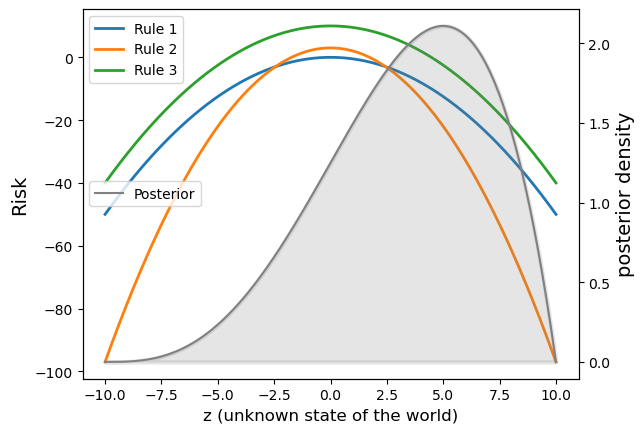

In [5]:
# toy example

risk_rule_1 = lambda z: -0.5 * z**2
risk_rule_2 = lambda z: -z**2 + 3
risk_rule_3 = lambda z: -0.5 * z**2 +10

z_vals = np.linspace(-10, 10, 1000)

plt.plot(z_vals, risk_rule_1(z_vals), label='Rule 1', lw=2)
plt.plot(z_vals, risk_rule_2(z_vals), label='Rule 2', lw=2)
plt.plot(z_vals, risk_rule_3(z_vals), label='Rule 3', lw=2)
plt.legend(loc='upper left')
plt.ylabel('Risk', fontsize=14)
plt.xlabel('z (unknown state of the world)', fontsize=12)

plt.twinx()
pz = st.beta(4, 2).pdf((z_vals+10)/20.)
plt.plot(z_vals, pz, label='Posterior', linestyle='-', color='gray')
plt.fill_between(z_vals, pz, color='gray', alpha=0.2, lw=3)
plt.legend(loc='center left')
plt.ylabel('posterior density', fontsize=14)

plt.show()


#### Connections
- A way to connect the two approaches is via the (confusingly named) "Bayes risk"

- In this case, you integrate the frequentist risk function over a **prior** $\pi$

- Here are all three ideas next to each other:
$$\begin{align}\rho(\pi^\star, a) &= \mathbb{E}_{z \sim \pi^\star(z \mid y)}\Big[\ell(z, a)\Big] & &\textrm{(Bayesian) posterior risk}\\
% 
R(z, \delta) &= \mathbb{E}_{y \sim \textrm{Pr}(y \mid z)}\Big[\ell(z, \delta(y))\Big] & &\textrm{(frequentist) risk}\\
r(\pi, \delta) &= \mathbb{E}_{z \sim \pi(z)}\Big[R(z, \delta)\Big] & &\textrm{``Bayes" risk}\\
\end{align}
$$

- A **"Bayes" rule** $\delta_{\pi}$ for prior $\pi$ is the decision rule that minimizes the "Bayes" risk:
$$\delta_\pi = \underset{\delta}{\textrm{argmin}} \,r(\pi, \delta)$$ 

- We can confirm [board] that this rule always takes the Bayes action $\delta_\pi(y) = \underset{a}{\textrm{argmin}} \,\,\rho(a, \pi^\star(\cdot \mid y))$


#### Takeaways
- In conclusion: **once you introduce a prior $\pi$, the choice of decision rule is clear** (for both frameworks)

- Reasoning under high uncertainty, high stakes, and time pressure generally requires incorporating priors

- [Bayesian search theory](https://en.wikipedia.org/wiki/Bayesian_search_theory) naturally emerged during the search for the USS _Scorpion_ (and other high uncertainty/stakes Navy searches)
----

### **Search effectiveness** probabilities (SEP)

- An important detail we have thus far ignored in this problem is the the SEP of cell $k$:
$$\textrm{SEP}_k \equiv q_k \equiv P(\textrm{find the submarine} \mid z=a=k)$$

- We have thus far assumed $q_k=1$. In reality, $q_k < 1$.

- If these are known (assumed/estimated), then we have to consider the loss of a **failed true positive (FTP)**:

- Again, if we are only considering searching $k$ or doing nothing, then:

|                  | $a = 0$   | $a=k$    |
| --------         | ------- |  ------- |
| $z \neq k$  | 0   | $\ell_{\textrm{FP}}$|
| $z=k$  | $\ell_{\textrm{FN}}$     | $(1-q_k)\,\ell_{\textrm{FTP}}$ |

<!-- - It remains the case that the loss of a true negative (TN) can be zero -->

- We should send the divers to $k$ if: 
$$\begin{align}
\rho(k, \pi^\star) &< \rho(0, \pi^\star) \\[1em]
\pi^\star_k(1-q_k)\,\ell_{\textrm{FTP}} +  (1-\pi^\star_k) \ell_{FP} &< \pi^\star_k \ell_{FN} \\[1em]
\frac{\ell_{FP}}{\ell_{FN} - (1-q_k)\,\ell_{\textrm{FTP}}} &< \frac{\pi^\star_k}{1-\pi^\star_k} 
\end{align}$$

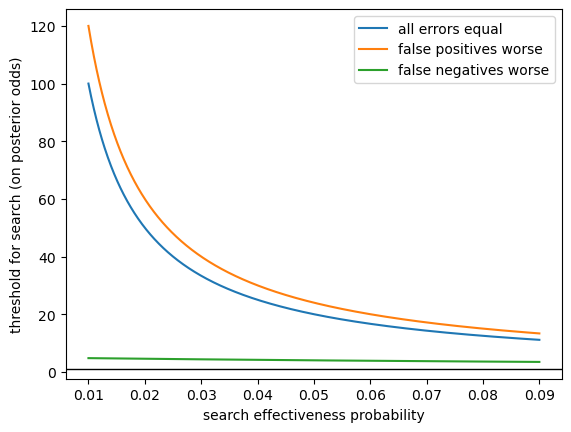

In [6]:
# plot threshold
q_vals = np.linspace(0.01,0.09,1000)

loss_fp = 1
loss_fn = 1
loss_ftp = 1
plt.plot(q_vals, loss_fp / (loss_fn - (1-q_vals) * loss_ftp), label='all errors equal')

loss_fp = 1.2
loss_fn = 1
loss_ftp = 1
plt.plot(q_vals, loss_fp / (loss_fn - (1-q_vals) * loss_ftp), label='false positives worse')

loss_fp = 1
loss_fn = 1.2
loss_ftp = 1
plt.plot(q_vals, loss_fp / (loss_fn - (1-q_vals) * loss_ftp), label='false negatives worse')

plt.xlabel('search effectiveness probability')
plt.ylabel('threshold for search (on posterior odds)')
plt.axhline(1, color='black', lw=1)
plt.legend()


_____
## Estimating SEPs with **binomial trials**
- The SEPs play an important role in our decision problem; how might we estimate them?

- Drop a (large) object into cell $k$ and see if divers can find it

- For each cell $k$, run $n_k$ trials, and assume:

$$b_{ki} \stackrel{\textrm{iid}}{\sim} \textrm{Bernoulli}(q_k) \textrm{ for } i = 1\dots n_k$$

- $b_{ki}=1$ means they found it on the $i^{\textrm{th}}$ trial

- Total number of successful searches is then $y_k = \sum_{i=1}^{n_k} b_{ki}$

$$y_{k} \sim \textrm{Binomial}(n_k,\, q_k)$$

- For reference the binomial PMF is:
$$\textrm{Binom}(y; n, q) = {n \choose y} q^{y} q^{n-y}$$
- where the **binomial coefficient** ${n \choose y}=\frac{n!}{y!(n-y)!}$ is the distribution's **normalizing constant**

- The maximum likelihood estimate is then:

$$\widehat{q}_k^{\textrm{MLE}}  = \frac{y_k}{n_k}$$

- Undefined for $n_k =0$

- High variance (frequentist sense) for small $n_k$

## **Beta-binomial** model
- **Introduce a prior** over $q_k$ to regularize estimates

- In this setting, the prior may **informative** (i.e., encode real background knowledge)

### **Beta distribution**

- Distribution over $q \in (0,1)$ bounded support, defined by PDF:
$$\textrm{Beta}(q; \alpha, \beta) = \frac{q^{\alpha-1} (1-q)^{\beta-1}}{\textrm{B}(\alpha, \beta)}$$

- The Beta **function** is $\textrm{B}(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$, which is the distribution's **normalizing constant**

- $\alpha > 0 $ and $\beta > 0$ are its **shape parameters**

- It is common to reparameterize it with **mean** $\mu=\mathbb{E}[q]$ and **concentration parameter** $\kappa$:
$$\begin{align}
\mu &= \frac{\alpha}{\alpha + \beta} \\
\kappa &= \alpha + \beta
\end{align}
$$

- $\kappa$ controls how concentrated the density

- We can change $\kappa$ without affecting $\mu$

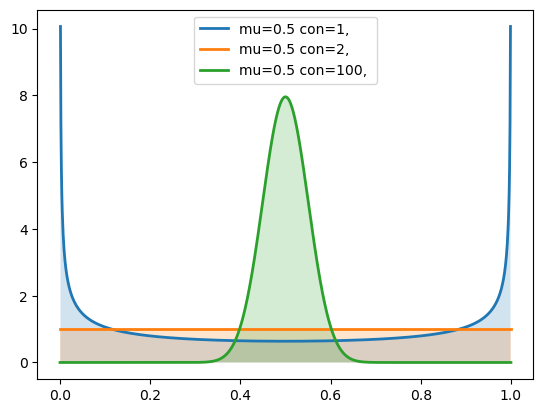

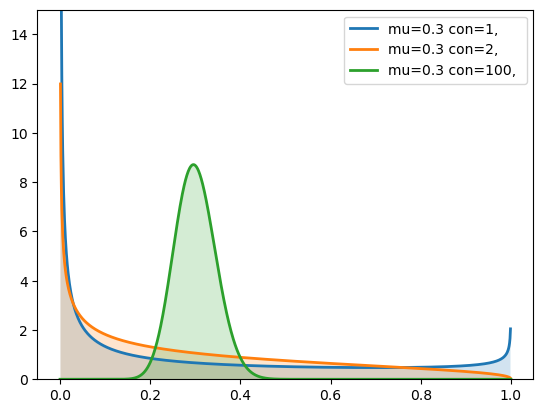

In [7]:
# plot beta densities
mu = 0.5
conc = 3
alpha = mu * conc

x = np.linspace(0, 1, 1000)
for conc in [1, 2, 100]:
    y = st.beta(mu * conc, (1-mu) * conc).pdf(x)
    plt.plot(x, y, label=f'mu={mu} con={conc}, ', lw=2)
    plt.fill_between(x, y, alpha=0.2, lw=3)
plt.legend()
plt.show()

mu = 0.3
x = np.linspace(0, 1, 1000)
for conc in [1, 2, 100]:
    y = st.beta(mu * conc, (1-mu) * conc).pdf(x)
    plt.plot(x, y, label=f'mu={mu} con={conc}, ', lw=2)
    plt.fill_between(x, y, alpha=0.2, lw=3)
plt.legend()
plt.ylim(0, 15)
plt.show()

### **Posterior** of beta-binomial model
- Using the prior $q \sim \textrm{Beta}(\alpha_0,\,\beta_0)$ (and igoring the cell $k$ subscript on $q_k$)

- We can show [on the board] that the posterior is:

$$P(q \mid y, n, \alpha_0, \beta_0) = \textrm{Beta}(q;\,\underbrace{\alpha_0+y}_{\triangleq \alpha_n},\,\underbrace{\beta_0+n-y}_{\triangleq \beta_n})$$

- (Another **conjugate** prior-likelihood pair)

- From this we can see the interpretation of $\alpha_0$ and $\beta_0$ as **pseudocounts**

- Using the mean-concentration parameterization:
$$\begin{align}
\mu_n &= \frac{\alpha_0 + y}{\alpha_0 + \beta_0 + n} \\[1em]
\kappa_n &= \alpha_0 + \beta_0 + n
\end{align}
$$

- **Posterior mean** [board]: 
$$
\begin{align}\mathbb{E}[q \mid \alpha_n, \beta_n] &= \frac{\alpha_n}{\alpha_n + \beta_n}\\
&= \widehat{q}^{\textrm{MLE}}\left(\frac{n}{n+\kappa_0}\right) + \mu_0\left(\frac{\kappa_0}{n+\kappa_0}\right)
\end{align}$$

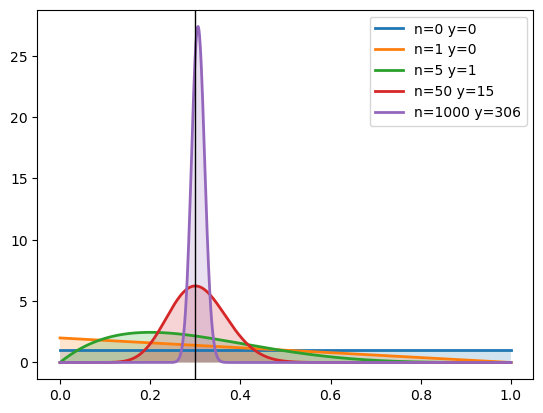

In [8]:
# plot beta densities
alpha = 1.0
beta = 1.0

true_q = 0.3
ns = [0, 1, 5, 50, 1000]
ys = [0]
for i, n in enumerate(ns[1:]):
    y = rn.binomial(n - np.sum(ns[:i]), true_q)
    y += ys[-1]
    ys.append(y)

x = np.linspace(0, 1, 1000)
for (n,y) in zip(ns, ys):
    fx = st.beta(alpha + y, beta + n - y).pdf(x)
    plt.plot(x, fx, label=f'n={n} y={y}', lw=2)
    plt.fill_between(x, fx, alpha=0.2, lw=3)
plt.legend()

plt.axvline(true_q, color='black', lw=1)
plt.show()

### Using the posterior: **propagating uncertainty** to decisions
- Once we have a posterior $P(q_1,\dots,q_K \mid -)$ how do we work it into the decision problem?

- One might be tempted to **plug-in a point estimate**. But which one?
    - e.g., $\widehat{q}_k \leftarrow \mathbb{E}[q_k \mid y_k, n_k]$
    - e.g., $\widehat{q}_k \leftarrow \mathbb{G}[q_k \mid y_k, n_k] = \exp(\mathbb{E}[\log q_k \mid y_k, n_k])$ (the _geometric_ mean)
    - e.g., $\widehat{q}_k \leftarrow \textrm{Mode}[q_k \mid y_k, n_k]$

- For Gaussian models, all choices are the same. More generally, they may differ (see plot below)

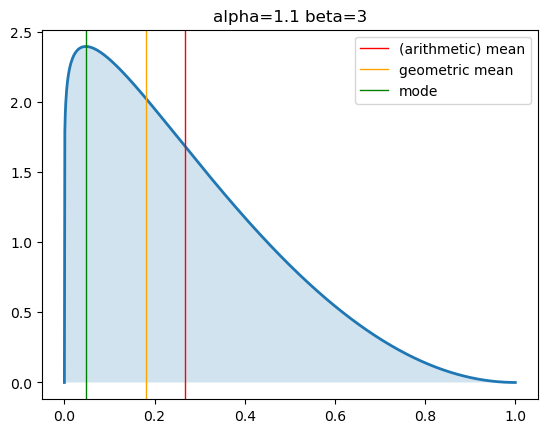

In [9]:
# plot different point estimates
import scipy.special as sp

alpha = 1.1
beta = 3

# (arithmetic) mean
ari_mean = alpha / (alpha + beta)
# geometric mean
geo_mean = np.exp(sp.digamma(alpha) - sp.digamma(alpha + beta))

# mode
mode = None
if alpha > 1 and beta > 1:
    mode = (alpha - 1) / (alpha + beta - 2)

x = np.linspace(0, 1, 1000)
y = st.beta(alpha, beta).pdf(x)
plt.plot(x, y, lw=2)
plt.fill_between(x, y, alpha=0.2, lw=3)
plt.axvline(ari_mean, lw=1, color='red', label='(arithmetic) mean')
plt.axvline(geo_mean, lw=1, color='orange',  label='geometric mean')
if mode is not None:
    plt.axvline(mode, lw=1, color='green', label='mode')
plt.legend()
title = f'alpha={alpha} beta={beta}'
if mode is None:
    title += ' (mode undefined)'
plt.title(title)
# plt.ylim(0, 15)
plt.show()

- The right answer is to **propagate our uncertainty** for as long as is practically feasible

- This means maintaining our entire posterior distribution, and integrating over it when making decisions

- We want to **avoid "pipelining"** point estimates in an ad hoc manner

- Let's see what happens when we integrate posterior risk over $q_k$. 

- Redefine the loss to be parameterized by the SEPs $\boldsymbol{q}=(q_1,\dots,q_K)$, and redefine our posterior $\pi^\star(z, \boldsymbol{q} \mid Y)$ to now govern both $z$ and $\boldsymbol{q}$. (The data $Y$ includes everything we know, including the binomial trials). The posterior risk is:

$$\rho(\pi^\star, a) = \mathbb{E}_{z, \boldsymbol{q} \sim \pi^\star}[\ell_{\boldsymbol{q}}(a, z)]$$

- [On the board] Show that integrating is equivalent to point estimating (in this case)

- So, the right answer is indeed to plug-in $\widehat{q}_k = \mathbb{E}[q_k \mid y_k, n_k]$. (But it won't always be!)

----
### The **beta-binomial _distribution_**
- The beta-binomial distribution has PMF:
$$\textrm{BetaBinom}(y;\, n, \alpha, \beta) = {n \choose y}\frac{\textrm{B}(\alpha + y, \beta + n-y)}{\textrm{B}(\alpha, \beta)}$$

- It is the **marginal likelihood of a beta-binomial _model_** (beta prior + binomial likelihood, as above):

$$\textrm{BetaBinom}(y;\, n, \alpha, \beta) = \int \textrm{Binom}(y; n, q) \textrm{Beta}(q;\,\alpha, \beta)\textrm{d}q$$

- For certain hyperparameter settings can become **overdispersed** (unlike the binomial)---i.e.,:
$$\frac{\textrm{Var}[y]}{\mathbb{E}[y]}> 1$$

#### **Sampling** from the beta-binomial

- There are two main ways to sample a beta-binomial random variable $y\sim \textrm{BB}(n, \alpha, \beta)$

- The first is under the **mixture representation**:
$$q \sim \textrm{Beta}(\alpha, \beta)\\
y \mid q \sim \textrm{Binomial}(n, q)$$

- The second is using the **Polya urn scheme**, which goes as follow:

    - We have an urn (i.e., a jar) with $\alpha$ red and $\beta$ black balls in it

    - For $n$ rounds: 
        - We randomly select a ball out of the urn.
        - If we pick a red ball, we put it back and also **add an additional red ball**. 
        - If we pick a black ball, same thing.
    
    - After $n$ rounds, we **report the number of red balls** in the urn.


<figure style="text-align: center;">
    <img src="img/polyaurn.png" width="500">
    <figcaption>Polya urn scheme</figcaption>
</figure>

(Picture from [this paper](https://www.proquest.com/docview/1951299991?pq-origsite=gscholar&fromopenview=true&sourcetype=Dissertations%20&%20Theses))

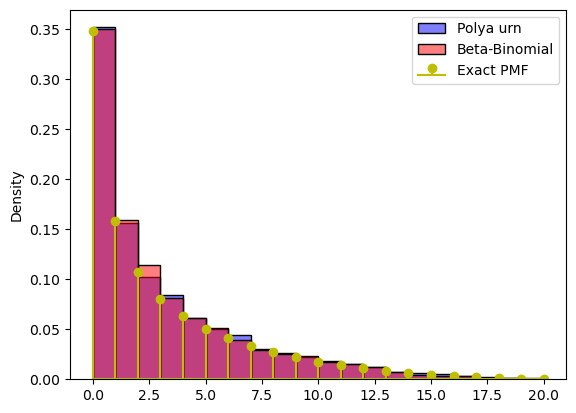

In [11]:
def polya_urn(n, alpha, beta):
    """
    This function draws a sample from the Beta-Binomial distribution
    using the Polya urn scheme.
    args:
        n - number of trials
        alpha - number of red balls in the urn
        beta - number of black balls in the urn
    """
    num_red = alpha
    num_black = beta
    for i in range(n):
        # prob of picking a red ball
        p_i = num_red / (num_red + num_black)
        # sample a ball
        if rn.rand() < p_i:
            # if red, add another red
            num_red += 1
        else:
            # if black, add another black
            num_black += 1
    return num_red

def beta_binomial(n, alpha, beta):
    """
    This function draws a sample from the Beta-Binomial distribution
    by first sampling a beta, and then sampling a binomial.
    args:
        n - number of trials
        alpha - first parameter of the beta distribution
        beta - second parameter of the beta distribution
    """
    p = rn.beta(alpha, beta)
    return rn.binomial(n, p)

n = 20
alpha = 0.5
beta = 3

n_samples = 10000
polya_urn_samples = np.array([polya_urn(n, alpha, beta) for _ in range(n_samples)])
betabinom_samples = np.array([beta_binomial(n, alpha, beta) for _ in range(n_samples)])

sns.histplot(polya_urn_samples, bins=range(n+1), stat='density', color='blue', label='Polya urn', alpha=0.5)
sns.histplot(betabinom_samples, bins=range(n+1), stat='density', color='red', label='Beta-Binomial', alpha=0.5)

pmf = st.betabinom(n, alpha, beta).pmf(range(n+1))
plt.stem(range(n+1), pmf, linefmt='y-', markerfmt='yo', basefmt='y-', label='Exact PMF')
plt.legend()
plt.show()

- Let's explore some of the structure of the beta-binomial [on the board]:

    - Consider $b_1 \dots b_n$ Bernoulli trials

    - Derive $P(b_1)$ (two forms)

    - Derive $P(b_i \mid b_{<i})$ (reveals the Polya urn scheme)

    - Derive $P(b_1,\dots,b_n)$ (simplifies with telescoping)
    
    - Derive $P(\sum_{i=1}^n b_i = y)$ (mention de Finetti, sufficient statistics)

____ 
## **Sharing information** across cells with Empirical Bayes

- If $n_k=0$ (no trials), the current estimate is simply the prior mean $\widehat{q}_k = \frac{\alpha_0}{\alpha_0 + \beta_0} = \mu_0$

- Presumably, the search probabilities are similar across cells: **information from cell $k$ should inform us about cell $k'$**

#### Fitting the hyperparameters

- Since $\alpha_0$ and $\beta_0$ determine the $q_k$ for any cell with $n_k=0$, it's natural to fit them


- Since the marginal likelihood has a closed form, it is natural to consider **type-II maximum likelihood**:

$$\widehat{\alpha}_0^{\textrm{MLE-II}},\, \widehat{\beta}_0^{\textrm{MLE-II}} \leftarrow \underset{\alpha_0, \beta_0}{\textrm{argmax}} \prod_{k=1}^K \textrm{BetaBinomial}(y_k;n_k,\,\alpha_0, \beta_0)$$


- We can interpret this as "fitting the prior" $q_k \sim \textrm{Beta}(\alpha_0, \beta_0)$ (though this strains the meaning of "prior")

- Notice now the posterior mean of $q_k$ is 

$$\mathbb{E}[q_k \mid -] = \widehat{q}_k^{\textrm{MLE}}\left(\frac{n}{n+\widehat{\kappa}_0^{\textrm{MLE-II}}}\right) + \widehat{\mu}_0^{\textrm{MLE-II}}\left(\frac{\widehat{\kappa}_0^{\textrm{MLE-II}}}{n+\widehat{\kappa}_0^{\textrm{MLE-II}}}\right)$$

- where we are using **mean** $\widehat{\mu}_0^{\textrm{MLE-II}}=\frac{\widehat{\alpha}_0^{\textrm{MLE-II}}}{\widehat{\alpha}_0^{\textrm{MLE-II}}+\widehat{\beta}_0^{\textrm{MLE-II}}}$ and **concentration parameter** $\widehat{\kappa}_0^{\textrm{MLE-II}}=\widehat{\alpha}_0^{\textrm{MLE-II}}+\widehat{\beta}_0^{\textrm{MLE-II}}$

- So similar to the JS-estimator for the normal means model, we arrive at a **shrinkage estimator**

- It uses the data across _all_ cells $\boldsymbol{y}_1,\dots,\boldsymbol{y}_K$, to estimate the SEP $q_k$ at a _single_ cell $k$

----
## **Connections** to other methods and applications

#### **Small area estimation**
- The problem for SEPs above is an example of a **small area estimation** problem

- Book: Rao & Molina (2015) [_Small Area Estimation_](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118735855)

- Motivated in large part by applied problems at the US Census

- Basic setup: we want to estimate a parameter $q_k$ (e.g., poverty rate) of many (small) geographic units $k$ (e.g., Census blocks)

- Generally involves covariates $\boldsymbol{x}_k$

- Example: [this paper](https://www.census.gov/library/working-papers/2013/demo/franco-01.html) by authors Franco & Bell (2013), who work at Census, uses the model:
$$\begin{align}
y_k &\sim \textrm{Binomial}(n_k,\, q_k) \\
\textrm{logit}(q_k) &\sim \mathcal{N}(\boldsymbol{x}_k^\top \boldsymbol{\beta},\, \sigma^2)\\
\end{align}
$$
- This is an example of a **generalized linear mixed model (GLMM)**, where the natural parameter is assumed to be a Gaussian random variable, whose mean is a linear function of covariates

- This model generalizes the [Fay-Herriot model](https://en.wikipedia.org/wiki/Fay%E2%80%93Herriot_model), which is the most common model in small area estimation

#### **Hierarchical Bayesian** modeling
- Instead of point-estimating the hyperparameters $\alpha_0, \beta_0$ using type-II maximum likelihood, we could have also treated them as random variables by introducing a prior $\alpha, \beta \sim P(\alpha, \beta)$ and then doing posterior inference

- This would be an example of a **hierarchical Bayesian model**, in which the parameters of the prior have hyperpriors

- The same intuition for why empirical Bayes is useful translates to this approach: **shrinkage** and **information sharing**

#### **Multilevel** regression 

- A special case of hierarchical Bayesian modeling is **multilevel regression**

- This area has been pioneered by Andrew Gelman, Jennifer Hill, and coauthors; two good books:
    - [_Data Analysis Using Regression and Multilevel/Hierarchical Models_](http://www.stat.columbia.edu/~gelman/arm/)
    - [_Regression and Other Stories_](https://avehtari.github.io/ROS-Examples/)

- The basic idea is that we have a regression, e.g., on **school test scores**
$$\begin{align}
y^{\textrm{school}}_i &\sim \mathcal{N}(\beta_0 + \beta^{\textrm{state}}_{\textrm{state}[i]} + \beta^{\textrm{city}}_{\textrm{city}[i]}  + \cdots,\,\sigma^2_y)
\end{align}
$$
- Here there is a coefficient vector for US state $\boldsymbol{\beta}^{\textrm{state}} = (\beta^{\textrm{state}}_{\textrm{AL}}, \beta^{\textrm{state}}_{\textrm{AK}}, \dots, \beta^{\textrm{state}}_{\textrm{WY}})$

- The notation $\beta^{\textrm{state}}_{\textrm{state}[i]}$ just selects the state of school $i$---e.g., if school $i$ is in Illinois, then $\beta^{\textrm{state}}_{\textrm{state}[i]} =\beta^{\textrm{state}}_{\textrm{IL}}$

- Now the **multilevel** part of the model is a hierarchical regression model for the coefficients, e.g.,

$$\begin{align}
\beta^{\textrm{state}}_{\textrm{IL}} &\sim \mathcal{N}(\alpha_0 + \alpha^{\textrm{GDP}} \boldsymbol{x}_{\textrm{IL}}^{\textrm{GDP}} +  \alpha^{\textrm{pop}} \boldsymbol{x}_{\textrm{IL}}^{\textrm{pop}}\cdots,\,\sigma^2_y)
\end{align}
$$

- where here we introduce covariates $\boldsymbol{x}_{\textrm{IL}}$ that are specific to _the state_ (in this case Illinois)

- Thus these models seek to shrink estimates across units (in this case, schools) by sharing information across all the (possibly many) groupings of units (e.g., by state, city, ...)
